In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d

### Задаём модели логистических аппроксимаций, линейную возьмём сразу из библиотеки

In [3]:
def func(x, a, b, c):
    return a/(1 + b*np.exp(-c * x))
def func1(x, a, b, c):
    x0=0.5
    return a/(1 + b*np.exp(-c * (x-x0)))


### Задаём данные, исходные xdata, ydata и сглаженные(увеличенный набор данных) xdata1, ydata1

In [13]:
xdata = np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,6])
xdata1 = np.arange(1,16,1)
ydata = (np.array([3,22,272,446,896,1222,1540,1870,2072,2562]))
ydata1 = np.array([3,22,126,272,446,625,896,1021,1222,1540,1721,1870,2072,2320,2562])
ydata2 = np.log(np.array([3,22,272,446,896,1222,1540,1870,2072,2562]))


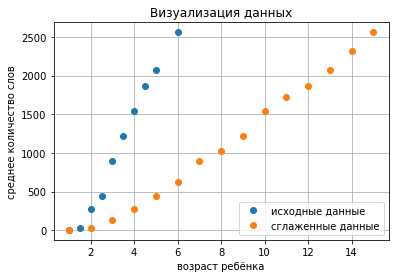

In [10]:
plt.plot(xdata,ydata, 'o', label='исходные данные')
plt.plot(xdata1,ydata1, 'o', label='сглаженные данные')
plt.title('Визуализация данных')
plt.xlabel('возраст ребёнка')
plt.ylabel('среднее количество слов')
plt.grid()
plt.legend()


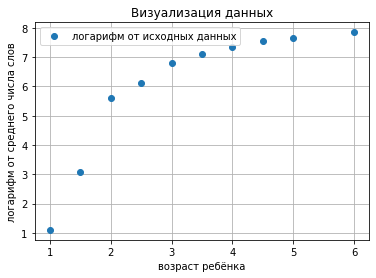

In [19]:

plt.plot(xdata,ydata2, 'o', label='логарифм от исходных данных')
plt.title('Визуализация данных')
plt.xlabel('возраст ребёнка')
plt.ylabel('логарифм от среднего числа слов')
plt.grid()
plt.legend()

<ipython-input-3-85653d6546c4>:5: RuntimeWarning: overflow encountered in exp
  return a/(1 + b*np.exp(-c * (x-x0)))


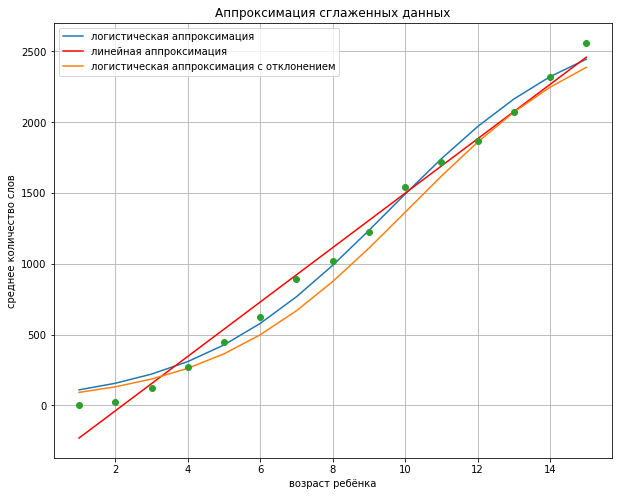

In [6]:
fig=plt.figure(figsize=(10,8))
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata1, ydata1)
popt, pcov = curve_fit(func, xdata1, ydata1)
popt1, pcov1 = curve_fit(func1, xdata1, ydata1)
plt.plot(xdata1, func(xdata1,*popt), label='логистическая аппроксимация')
plt.plot(xdata1, intercept + slope*xdata1, 'r', label='линейная аппроксимация')
plt.plot(xdata1, func1(xdata1,*popt), label='логистическая аппроксимация с отклонением')
plt.plot(xdata1,ydata1, 'o')
plt.grid()
plt.title('Аппроксимация сглаженных данных')
plt.xlabel('возраст ребёнка')
plt.ylabel('среднее количество слов')
plt.legend()

In [22]:
#чебышевская норма-максимальое отклонение
print(max(np.abs(func(xdata1, *popt)-ydata1)), 'ошибка логистической модели')
print(max(np.abs(func1(xdata1, *popt1)-ydata1)), 'ошибка логистической модели с отклонением')
print(std_err, 'ошибка линейной аппроксимации')

134.28965468244328 ошибка логистической модели
134.2895719635289 ошибка логистической модели с отклонением
5.6600785108817355 ошибка линейной аппроксимации


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


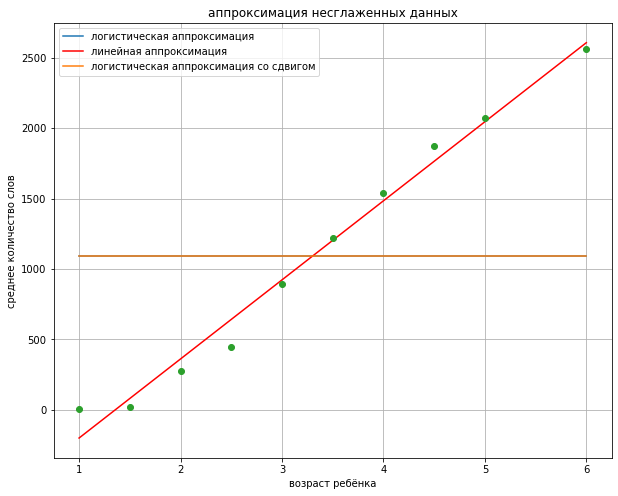

In [20]:
fig1=plt.figure(figsize=(10,8))
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(xdata, ydata)
popt2, pcov2 = curve_fit(func, xdata, ydata)
popt3, pcov3 = curve_fit(func1, xdata, ydata)
plt.plot(xdata, func(xdata,*popt2), label='логистическая аппроксимация')
plt.plot(xdata, intercept1 + slope1*xdata, 'r', label='линейная аппроксимация')
plt.plot(xdata, func1(xdata,*popt3),label='логистическая аппроксимация со сдвигом')
plt.plot(xdata,ydata, 'o')
plt.grid()
plt.title('аппроксимация несглаженных данных')
plt.xlabel('возраст ребёнка')
plt.ylabel('среднее количество слов')
plt.legend()

In [21]:
print(max(np.abs(func(xdata, *popt2)-ydata)), 'ошибка логистической модели')
print(max(np.abs(func1(xdata, *popt3)-ydata)), 'ошибка логистической модели с отклонением')
print(std_err1, 'ошибка линейной аппроксимации')

1471.5000038369105 ошибка логистической модели
1471.5000000992923 ошибка логистической модели с отклонением
24.290001917194324 ошибка линейной аппроксимации


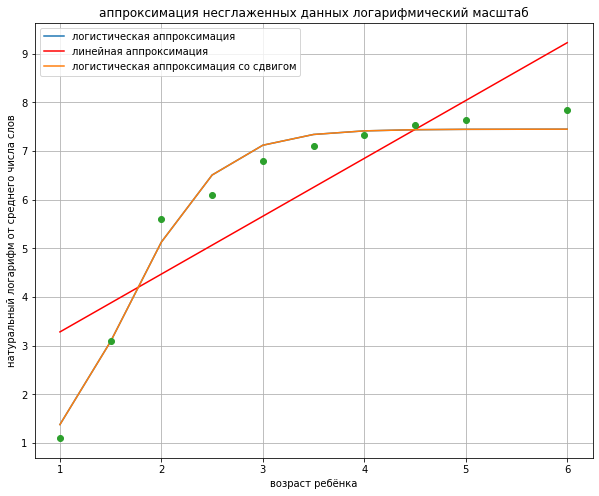

In [22]:
fig1=plt.figure(figsize=(10,8))
slope11, intercept11, r_value11, p_value11, std_err11 = stats.linregress(xdata, ydata2)
popt21, pcov21 = curve_fit(func, xdata, ydata2)
popt31, pcov31 = curve_fit(func1, xdata, ydata2)
plt.plot(xdata, func(xdata,*popt21), label='логистическая аппроксимация')
plt.plot(xdata, intercept11 + slope11*xdata, 'r', label='линейная аппроксимация')
plt.plot(xdata, func1(xdata,*popt31),label='логистическая аппроксимация со сдвигом')
plt.plot(xdata,ydata2, 'o')
plt.grid()
plt.title('аппроксимация несглаженных данных логарифмический масштаб')
plt.xlabel('возраст ребёнка')
plt.ylabel('натуральный логарифм от среднего числа слов')
plt.legend()

In [23]:
print(max(np.abs(func(xdata, *popt21)-ydata2)), 'ошибка логистической модели')
print(max(np.abs(func1(xdata, *popt31)-ydata2)), 'ошибка логистической модели с отклонением')
print(std_err11, 'ошибка линейной аппроксимации')

0.47755226801014317 ошибка логистической модели
0.4775973631794157 ошибка логистической модели с отклонением
0.25563796906117975 ошибка линейной аппроксимации


## Вывод: для исходных данных логистическая аппроксимация не подходит так как ошибка в сравнении с исходными данными слишком большая, ошибка линейной аппроксимации примерно 24.92, что в масштабе с исходными данными нормально. Чтобы данные можно было аппроксимировать логистическими моделями есть 2 варианта:
## 1.надо сделать так, чтобы приращения ординаты были более сопоставимы с приращениями абсциссы, это можно сделать, уменьшая угол наклона прямой линейной аппроксимации данных, что в сути и было сделано на сглаженных данных, но ошибка линейной аппроксимации сглаженных данных всё равно много меньше(на 2 порядка) ошибки логистической аппроксимации, что говорит нам о том, что для таких данных, как в условии больше всего подходит линейная аппроксимация.
## 2.взять значения оси игрек в логарифмическом масштабе, что так же ослабляет рост функции, при этом варианте ошибка линейной аппроксимации так же самая маленькая.